# Alura Challenge: Análise de Evasão de Clientes (Churn)

## Introdução

O objetivo deste projeto é analisar o comportamento dos clientes de uma empresa de telecomunicações com o intuito de entender os fatores que levam à evasão (churn). A retenção de clientes é fundamental para a sustentabilidade do negócio, visto que conquistar um novo cliente tende a ser mais caro do que manter um existente. Através desta análise, buscamos fornecer insights para ajudar a reduzir a taxa de churn.

In [154]:
import pandas as pd

In [197]:
df = pd.read_json('/content/challenge_Alura.json')
df.to_json('ProjetoCompleto.json',index= False)

In [156]:
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,True,Female,False,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,True,Mailed check,65.6,593.30
1,0003-MKNFE,True,Male,False,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,True,Mailed check,59.9,542.40
2,0004-TLHLJ,True,Male,False,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,True,Electronic check,73.9,280.85
3,0011-IGKFF,True,Male,True,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,True,Electronic check,98.0,1237.85
4,0013-EXCHZ,True,Female,True,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,True,Mailed check,83.9,267.40


In [157]:
colunas_bool = ['Partner','Dependents','PhoneService','MultipleLines','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','OnlineSecurity']


In [158]:
for col in colunas_bool:
    print(f"{col}: {df[col].unique()}")

Partner: ['Yes' 'No']
Dependents: ['Yes' 'No']
PhoneService: ['Yes' 'No']
MultipleLines: ['No' 'Yes' 'No phone service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['Yes' 'No' 'No internet service']
StreamingTV: ['Yes' 'No' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
OnlineSecurity: ['No' 'Yes' 'No internet service']


In [159]:
# Dicionário de mapeamento padronizado
mapa = {
    'yes': True,
    'no': False,
    'no internet service': False,
    'no phone service': False
}


# Aplicando o mapeamento
for col in colunas_bool:
    df[col] = (
        df[col]
        .astype(str)               # garante que tudo é string
        .str.strip()               # remove espaços extras
        .str.lower()               # padroniza para minúsculas
        .map(mapa)                 # mapeia para True/False
    )

In [160]:
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,True,Female,False,True,True,9,True,False,DSL,...,True,False,True,True,False,One year,True,Mailed check,65.6,593.30
1,0003-MKNFE,True,Male,False,False,False,9,True,True,DSL,...,False,False,False,False,True,Month-to-month,True,Mailed check,59.9,542.40
2,0004-TLHLJ,True,Male,False,False,False,4,True,False,Fiber optic,...,False,True,False,False,False,Month-to-month,True,Electronic check,73.9,280.85
3,0011-IGKFF,True,Male,True,True,False,13,True,False,Fiber optic,...,True,True,False,True,True,Month-to-month,True,Electronic check,98.0,1237.85
4,0013-EXCHZ,True,Female,True,True,False,3,True,False,Fiber optic,...,False,False,True,True,False,Month-to-month,True,Mailed check,83.9,267.40


In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   bool   
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   bool   
 4   Partner           7267 non-null   bool   
 5   Dependents        7267 non-null   bool   
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   bool   
 8   MultipleLines     7267 non-null   bool   
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   bool   
 11  OnlineBackup      7267 non-null   bool   
 12  DeviceProtection  7267 non-null   bool   
 13  TechSupport       7267 non-null   bool   
 14  StreamingTV       7267 non-null   bool   
 15  StreamingMovies   7267 non-null   bool   
 16  Contract          7267 non-null   object 
 17  

In [166]:
import re

def padronizar_nomes_colunas(df):
    df.columns = [
        re.sub(r'[.\s]+', '_', # substitui espaços por _
               col.strip().lower())  # remove espaços nas pontas e põe em minúsculas
        for col in df.columns
    ]
    return df


In [167]:
df = padronizar_nomes_colunas(df)

In [168]:
df.head()

,customerid,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges_monthly,charges_total
0,0002-ORFBO,True,Female,False,True,True,9,True,False,DSL,...,True,False,True,True,False,One year,True,Mailed check,65.6,593.30
1,0003-MKNFE,True,Male,False,False,False,9,True,True,DSL,...,False,False,False,False,True,Month-to-month,True,Mailed check,59.9,542.40
2,0004-TLHLJ,True,Male,False,False,False,4,True,False,Fiber optic,...,False,True,False,False,False,Month-to-month,True,Electronic check,73.9,280.85
3,0011-IGKFF,True,Male,True,True,False,13,True,False,Fiber optic,...,True,True,False,True,True,Month-to-month,True,Electronic check,98.0,1237.85
4,0013-EXCHZ,True,Female,True,True,False,3,True,False,Fiber optic,...,False,False,True,True,False,Month-to-month,True,Mailed check,83.9,267.40


In [169]:
df.columns

Index(['customerid', 'churn', 'gender', 'seniorcitizen', 'partner',
       'dependents', 'tenure', 'phoneservice', 'multiplelines',
       'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection',
       'techsupport', 'streamingtv', 'streamingmovies', 'contract',
       'paperlessbilling', 'paymentmethod', 'charges_monthly',
       'charges_total'],
      dtype='object')

In [172]:
df['contas_diarias'] = (df['charges_monthly']/30).round(2)

In [175]:
df.describe().round(2)

,tenure,charges_monthly,charges_total,contas_diarias
count,7267.00,7267.00,7267.00,7267.00
mean,32.35,64.72,2277.18,2.16
std,24.57,30.13,2268.65,1.00
min,0.00,18.25,0.00,0.61
25%,9.00,35.42,396.20,1.18
50%,29.00,70.30,1389.20,2.34
75%,55.00,89.88,3778.52,3.00
max,72.00,118.75,8684.80,3.96


## Análise Exploratória de Dados (EDA)

In [176]:
import matplotlib.pyplot as plt

In [177]:
df.groupby(['churn', 'contract']).size().unstack()

contract,Month-to-month,One year,Two year
churn,,,
False,130,46,48
True,3875,1473,1695


<Axes: xlabel='churn'>

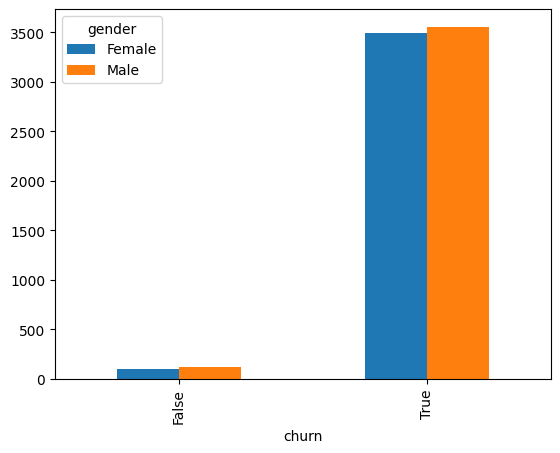

In [178]:
df.groupby(['churn', 'gender']).size().unstack().plot(kind='bar')

In [179]:
df.groupby(['churn', 'contract']).size().unstack()

contract,Month-to-month,One year,Two year
churn,,,
False,130,46,48
True,3875,1473,1695


<Axes: xlabel='churn'>

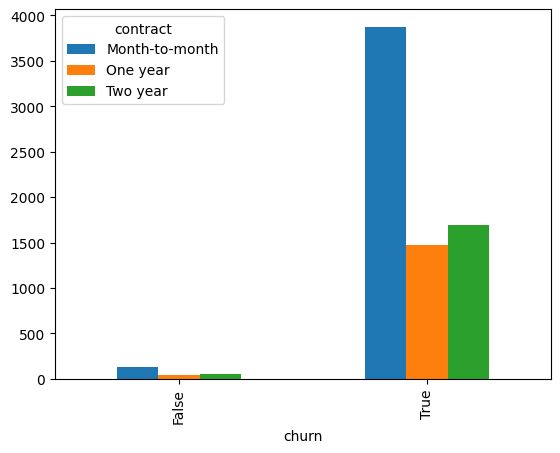

In [180]:
df.groupby(['churn', 'contract']).size().unstack().plot(kind='bar')

In [181]:
df.groupby(['churn', 'paymentmethod']).size().unstack()

paymentmethod,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
churn,,,,
False,45,46,80,53
True,1544,1522,2365,1612


<Axes: xlabel='churn'>

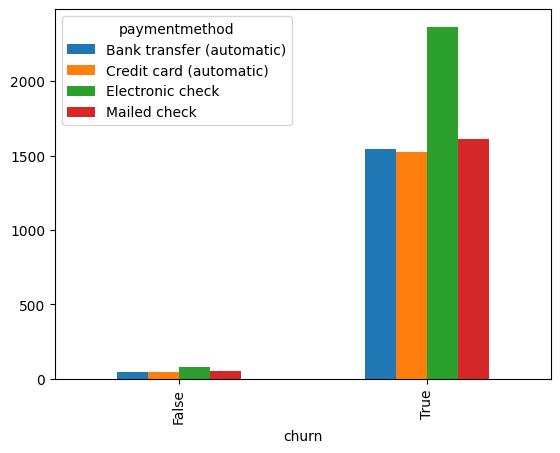

In [182]:
df.groupby(['churn', 'paymentmethod']).size().unstack().plot(kind = 'bar')

In [184]:
df.groupby(['churn', 'gender'])['charges_total'].mean().unstack().round(2)

gender,Female,Male
churn,,
False,2156.37,2232.09
True,2279.92,2279.55


In [185]:
df.groupby(['churn', 'paymentmethod'])['charges_total'].mean().unstack().round(2)

paymentmethod,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
churn,,,,
False,2263.13,3372.04,2329.86,920.17
True,3075.31,3069.38,2090.87,1049.25


In [186]:
df.groupby(['churn', 'dependents','gender'])['charges_total'].mean().unstack().round(2)


gender             Female     Male
churn dependents                  
False False       2047.81  2199.76
      True        2424.17  2294.37
True  False       2202.26  2173.23
      True        2465.74  2522.57

In [187]:
df.groupby(['churn'])['charges_total'].mean().round(2)

,charges_total
churn,
False,2196.93
True,2279.73


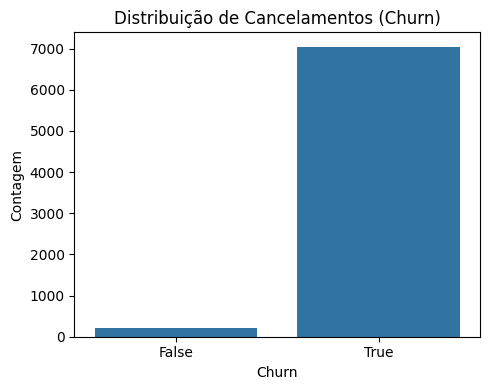

In [188]:
import seaborn as sns


plt.figure(figsize=(5, 4))
sns.countplot(x="churn", data=df)
plt.title("Distribuição de Cancelamentos (Churn)")
plt.xlabel("Churn")
plt.ylabel("Contagem")
plt.tight_layout()
plt.show()


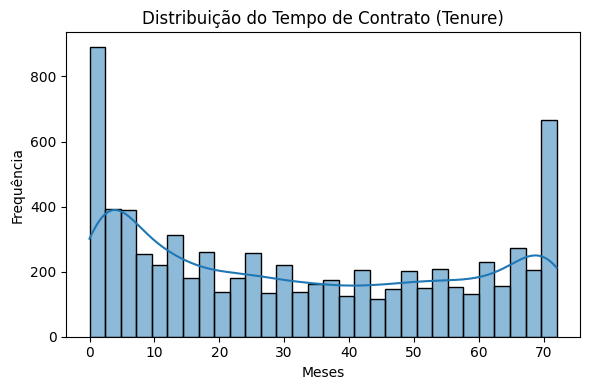

In [189]:
plt.figure(figsize=(6, 4))
sns.histplot(df["tenure"], bins=30, kde=True)
plt.title("Distribuição do Tempo de Contrato (Tenure)")
plt.xlabel("Meses")
plt.ylabel("Frequência")
plt.tight_layout()
plt.show()


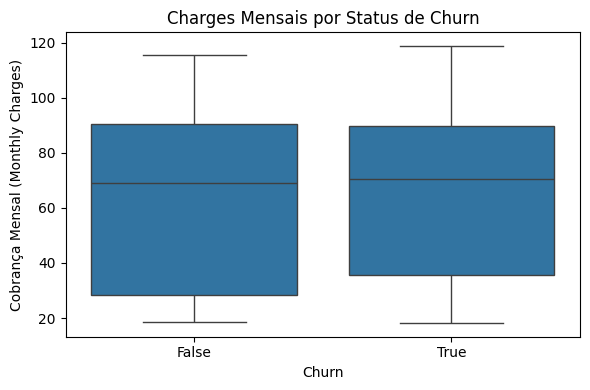

In [190]:
plt.figure(figsize=(6, 4))
sns.boxplot(x="churn", y="charges_monthly", data=df)
plt.title("Charges Mensais por Status de Churn")
plt.xlabel("Churn")
plt.ylabel("Cobrança Mensal (Monthly Charges)")
plt.tight_layout()
plt.show()

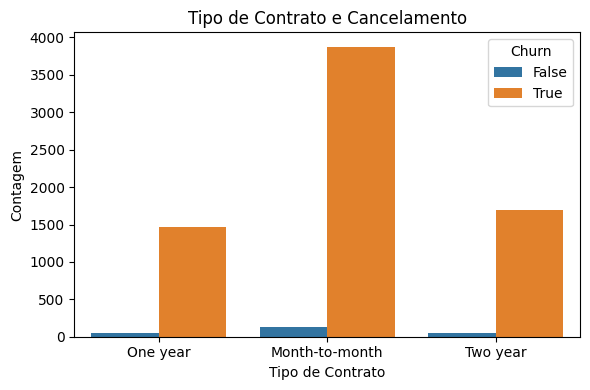

In [191]:
plt.figure(figsize=(6, 4))
sns.countplot(x="contract", hue="churn", data=df)
plt.title("Tipo de Contrato e Cancelamento")
plt.xlabel("Tipo de Contrato")
plt.ylabel("Contagem")
plt.legend(title="Churn")
plt.tight_layout()
plt.show()

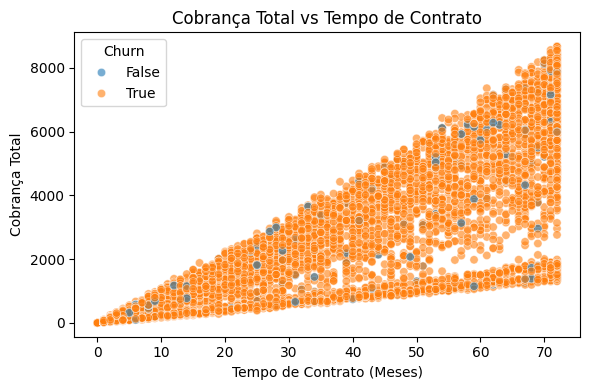

In [192]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x="tenure", y="charges_total", hue="churn", data=df, alpha=0.6)
plt.title("Cobrança Total vs Tempo de Contrato")
plt.xlabel("Tempo de Contrato (Meses)")
plt.ylabel("Cobrança Total")
plt.legend(title="Churn")
plt.tight_layout()
plt.show()

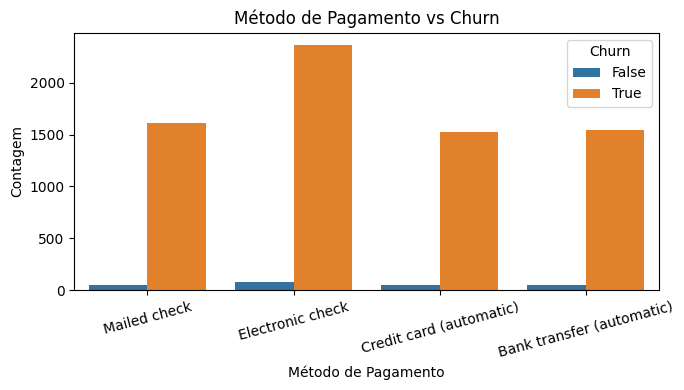

In [193]:
plt.figure(figsize=(7, 4))
sns.countplot(x="paymentmethod", hue="churn", data=df)
plt.title("Método de Pagamento vs Churn")
plt.xlabel("Método de Pagamento")
plt.ylabel("Contagem")
plt.xticks(rotation=15)
plt.legend(title="Churn")
plt.tight_layout()
plt.show()

In [194]:
# Separar os dois grupos
churned = df[df['churn'] == True]
not_churned = df[df['churn'] == False]

# Função para mostrar estatísticas
def resumir_estatisticas(coluna):
    print(f"\n📌 Estatísticas para '{coluna}':\n")
    print("Clientes que CANCELARAM:")
    print(churned[coluna].describe())
    print("\nClientes que NÃO CANCELARAM:")
    print(not_churned[coluna].describe())

# Aplicar às colunas monetárias
for coluna in ['charges_monthly', 'charges_total', 'contas_diarias']:
    resumir_estatisticas(coluna)



📌 Estatísticas para 'charges_monthly':

Clientes que CANCELARAM:
count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: charges_monthly, dtype: float64

Clientes que NÃO CANCELARAM:
count    224.000000
mean      63.412277
std       31.388712
min       18.750000
25%       28.425000
50%       69.100000
75%       90.412500
max      115.550000
Name: charges_monthly, dtype: float64

📌 Estatísticas para 'charges_total':

Clientes que CANCELARAM:
count    7043.000000
mean     2279.734304
std      2266.794470
min         0.000000
25%       398.550000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: charges_total, dtype: float64

Clientes que NÃO CANCELARAM:
count     224.000000
mean     2196.933705
std      2329.961954
min        18.900000
25%       351.037500
50%      1163.175000
75%      3562.862500
max      8425.300000
Name: charges_total, dtype: float6

## Conclusões e Insights

- Clientes com contratos mensais têm maior probabilidade de churn.
- A ausência de serviços adicionais como suporte técnico está associada a maior evasão.
- Valores maiores em "TotalGasto" nem sempre estão relacionados a churn.
- Clientes com muitos meses de serviço tendem a permanecer mais.